## 1. Keras 훑어보기

### 1) 전처리 (Preprocessing)

#### Tokenizer
토큰화, 정수 인코딩에 사용

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
t = Tokenizer()
fit_text='The earth is an awesome place live'
t.fit_on_texts([fit_text])

test_text = 'The earth is an great place live'
sequences = t.texts_to_sequences([test_text])[0]

print('sequences: ', sequences) # great는 단어 집합에 없어서 출력 x
print('word_index: ', t.word_index) # 단어집합

sequences:  [1, 2, 3, 4, 6, 7]
word_index:  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


#### pad_sequence()
모든 샘플의 길이를 동일하게 맞춰야 할 때 사용     
정해진 기리보다 길면 자르고 짧으면 빈 값을 0으로 채운다.

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences([[1,2,3],[3,4,5,6],[7,8]], maxlen=3, padding='pre') # pre: 앞을 채움 / post: 뒤를 채움

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

### 2) 워드 임베딩(Word Embedding)
텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것      
- 밀집 벡터: 대부분의 값이 실수이고 원핫인코딩에 비해 상대적으로 저차원!     
              
              
|-|One-hot Vector|Embedding Vector|
|---|---|---|
|차원|고차원(단어 집합의 크기만큼)|저차원|
|다른 표현|sparse vector의 일종|dense vector의 일종|
|표현 방법|수동|훈련 데이터로부터 학습|
|값의 타입|1 또는 0|실수|           
                 
    - 워드 임베딩 과정을 통해 얻어진다
    - 주로 256, 512, 1024 등의 차원
    - 초기값은 랜덤 -> 인공 신경망같이 학습되면서 변경됨.
                  
- Embedding(): 단어를 밀집 벡터로 만드는 역할.       
정수 인코딩이 된 단어들을 받아서 임베딩을 수행한다.       
(number of samples, input_length)인 2D 정수 텐서를 입력으로 받음 => (number of samples, input_length, embedding word dimensionality)인 3D텐서를 return      
Ex)        
```python
Embedding(7,2,input_length=5)      
```
    - 7: 단어 집합의 크기
    - 2: 임베딩한 후 벡터의 크기
    - 5: 각 입력 시퀀스의 길이

### 3) 모델링(Modeling)

#### Sequential()
입력층, 은닉층, 출력층, 임베딩 층 등의 층을 구성하기 위해 사용.             
Sequential()로 모델 선언 뒤 model.add()로 층을 단계적으로 추가한다.      
```python
from tensorflow.keras.models. import Sequential
model = Sequential()
model.add(추가할 층)
model.add(추가할 층)
model.add(추가할 층)
```

#### Dense()
fully connected layer를 추가. -> model.add()를 이용       
                
Ex1)
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu')
```
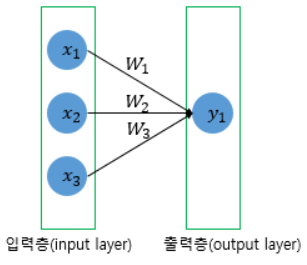
Dense의 인자들        
- 첫번째 인자: 출력 뉴런의 수
- input_dim: 입력 차원
- activation: 활성화 함수
    - linear: 디폴트값. 활성화함수 없이 가중치 계산 결과 출력
    - sigmoid: 이진분류에 사용
    - softmax: 다중 클래스 분류 문제에서 주로 사용
    - relu: 은닉층에 주로 사용
                      
                      
Ex2) Dense()를 두번 사용: 첫번째 dense 층이 은닉층이 됨. 
```python
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```
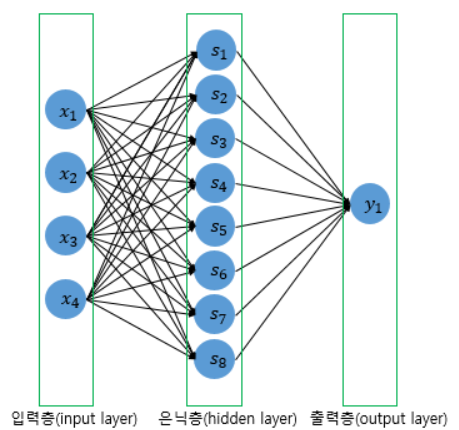

#### summary()
모델의 정보를 요약

### 4) Compile, Training

#### compile()
모델을 기계가 이해할 수 있도록 컴파일함. 오차 함수, 최적화 방법, 메트릭 함수를 선택할 수 있다          
Ex) RNN 모델 compile
```python
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
max_features = 10000

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
```
- optimizer: 'rmsprop', 'adam', 'sgd' 등
- loss: 손실함수
- metrics: 훈련을 모니터링 하기 위한 지표
                 
대표적인 손실 함수와 활성화 함수 조합           
                   
|문제유형|손실 함수명|출력층의 활성화함수|
|---|---|---|
|회귀문제|mean_squared_error(평균 제곱 오차)|-|
|다중클래스분류|categorical_crossentrop(원핫 인코딩 상태일때))|소프트맥스|
|다중클래스분류|sparse_categorical_crossentropy(정수 인코딩 상태에서 수행가능)|소프트맥스|
|이진분류|binary_crossentropy|시그모이드|

#### fit
모델 학습
```python
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))
```
- epoch: 총 훈련횟수
- batch_size: 배치 크기. default:32 / 미니배치 경사하강법을 안쓸 때는 None
- validation_split: 별도로 validation set을 사용 안하고, train에서 일정 비율을 분리해서 검증 데이터로 사용함.
- verbose: 학습 중 출력되는 문구. 
    - 0: 아무것도 출력 x
    - 1: 진행 막대로 훈련의 진행도를 볼 수 있음.
    - 2: 미니배치마다 손실 정보를 출력

### 5) 평가와 예측

#### evaluate()
학습한 모델의 정확도를 평가
```python
model.evaluate(X_text, y_text, batch_size=32)
```
             
#### predict()
임의의 입력에 대한 모델의 출력값 확인
```python
model.predict(X_input, batch_size=32)
```

### 6) 모델 저장, 로드

#### save()
인공신경망 모델을 hdf5 파일에 저장
```python
model.save('model_name.h5')
```
            
#### load_model()
저장해둔 모델을 불러옴
```python
from tensorflow.keras.models import load_model
model = load.model("model_name.h5")
```

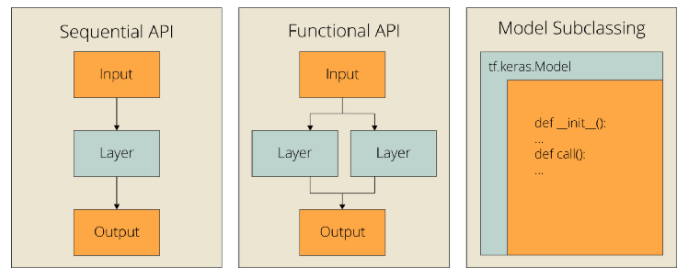

## 2. 케라스의 함수형 API (Keras Functional API)
복잡한 모델을 생성할 때 sequential API보다 주로 사용하는 functional API     
자세한 소개: https://keras.io/getting-started/functional-api-guide/

### 1) sequential API로 만든 기본적인 모델
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
```
: 직관적이고 편리하지만 단순히 층을 쌓는 것만으로 구현할 수 없는 복잡한 신경망 구현 불가.

### 2) Functional API로 만든 모델
각 층을 일종의 함수(function)로서 정의하고, 각 함수를 조합하기 위한 연산자를 제공 -> 이를 이용하여 신경망을 설계한다.

#### (1) 전결합 피드 포워드 신경망(Fully-connected FFNN)
예) 입력 차원이 1인 fully-connected feed forward neural net
```python
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

inputs = Input(shape=(10,))  # 입력텐서 - Input 함수에 입력의 크기 정의
hidden1 = Dense(64, activation='relu')(inputs) # 이전층이 다음층 함수의 입력으로 사용됨
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output) # 입력과 출력을 정의

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(data, labels)
```

#### (2) 선형 회귀(Linear Regression)
```python
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
linear_model.fit(X, y, batch_size=1, epochs=300, shuffle=False)
```

#### (3) 로지스틱 회귀(Logistic Regression)
```python
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)
```

#### (4) multiple inputs 모델
```python
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

# 연결된 값을 입력으로 받는 밀집층을 추가(Dense layer)
z = Dense(2, activation="relu")(result)
# 선형 회귀를 위해 activation=linear를 설정
z = Dense(1, activation="linear")(z)

# 결과적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델이 됨.
model = Model(inputs=[x.input, y.input], outputs=z)
```

#### (5) RNN 은닉층 사용
하나의 feature에 50개의 시점(time-step)을 입력으로 받는 모델
```python
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs) # RNN의 일종인 LSTM을 사용
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=output)
```

#### (6) 다르게 보이지만 동일한표기
```python
encoder = Dense(128)(input)
```
이 코드는 밑의 코드처럼 두줄로 표현할 수 있음!
```python
encoder = Dense(128)
encoder(input)
```

## 3. 케라스 서브클래싱 API (Keras Subclassing API)
- Functional API로도 구현할 수 없는 복잡한 모델들을 구현할 수 있음. (예: 재귀 네트워크, 트리 RNN)
- 객체 지향 프로그래밍에 익숙해야 해서 코드 사용이 까다로움.
- class 형태의 모델
```python
class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred
```
    - tf.keras.Model을 상속받음
    - init()에서 모델의 생성자를 정의함
    - super(): 여기서 만든 클래스는 tf.keras.Model 클래스의 속성들을 가지고 초기화된다.
    - call() 함수: 모델이 데이터를 입력받아 예측값을 리턴하느 포워드 연산을 진행시킴.

## 4. 다층 퍼셉트론(MLP, Multilayer Perceptron)으로 텍스트 분류하기
은닉층이 1개 이상 추가된 신경망으로, feed forward neural network의 가장 기본형태.

### 1) keras의 texts_to_matrix()
입력된 텍스트 데이터로부터 행렬을 만드는 도구

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [3]:
## 정수 인코딩
t = Tokenizer()
t.fit_on_texts(texts)
print(t.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


- count 모드        
DTM 생성: 단어 순서 정보는 보존되지 않음      
각 단어에 부여되는 인덱스는 1부터 시작하는데, 행렬 인덱스는 0부터 시작해서 첫번째 열은 다 0으로 되어있다.(어떤 단어도 할당되지 않음)

In [4]:
print(t.texts_to_matrix(texts, mode='count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


- binary 모드      
DTM과 유사한데, 해당 단어가 존재하는지 여부에만 관심을 가져서 빈도가 2 이상이라도 1로 표현한다.

In [5]:
print(t.texts_to_matrix(texts, mode='binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


- tfidf모드         
TF-IDF 행렬

In [6]:
print(t.texts_to_matrix(texts, mode='tfidf').round(2))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


- freq모드       
분자: 각 단어의 등장 횟수       
분모: 각 문서의 크기

In [7]:
print(t.texts_to_matrix(texts, mode='freq').round(2))

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


### 2) 실습: Twenty Newsgroups 데이터

In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [9]:
# train data만 return  (전체 데이터 뽑을 때는 all!)
newsdata = fetch_20newsgroups(subset = "train")

In [10]:
# 데이터의 속성 확인
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [11]:
# 샘플 게수 확인
print('훈련용 샘플 개수: {}'.format(len(newsdata.data)))

훈련용 샘플 개수: 11314


In [12]:
# 20개의 주제 확인
print('총 주제 개수: {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제 개수: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [13]:
# 1번째 샘플의 주제 확인
print('1번째 샘플의 레이블: {}'.format(newsdata.target[0]))

1번째 샘플의 레이블: 7


In [14]:
# 7번 레이블이 어떤 주제인지 확인해보기
print('7번 레이블이 의미하는 주제: {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제: rec.autos


In [15]:
# 1번째 샘플의 본문 확인
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [16]:
# data와 target을 데이터프레임으로 생성
data = pd.DataFrame(newsdata.data, columns=['email'])
data['target'] = pd.Series(newsdata.target)
data.head()

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [18]:
# null값 있는지 확인
data.isnull().values.any()  # False -> Null값 없음!

False

In [19]:
# 변수별 unique 개수 확인
print("중복 제외 샘플 수: {}".format(data['email'].nunique()))
print("중복 제외 주제 수: {}".format(data['target'].nunique()))

중복 제외 샘플 수: 11314
중복 제외 주제 수: 20


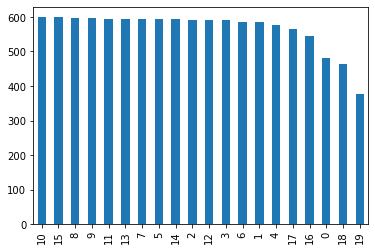

In [21]:
# 레이블 분포 시각화
data['target'].value_counts().plot(kind='bar');

대체적으로 400~600개 사이의 분포를 보임!

In [22]:
# 각 label의 구체적인 수치 확인
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [23]:
# 메일 본문과 레이블 분리, 텍스트 데이터 불러오기
newsdata_test = fetch_20newsgroups(subset = 'test', shuffle = True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [24]:
# 전처리
max_words = 10000  # 실습에 사용할 최대 단어 개수
num_classes = 20   # 레이블 수

def prepare_data(train_data, test_data, mode): # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [27]:
x_train, x_test, index_to_word = prepare_data(train_email, test_email, 'binary')

y_train = to_categorical(train_label, num_classes)  #One-Hot Encoding
y_test = to_categorical(test_label, num_classes)

In [29]:
print('훈련 샘플 본문의 크기 : {}'.format(x_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(x_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [30]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


#### 텍스트 분류 by MLP

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [32]:
# 다층 퍼셉트론
#   함수로 모델 설계: 입력값을 바꿔가면서 모델을 여러번 호출할 수 있음!
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

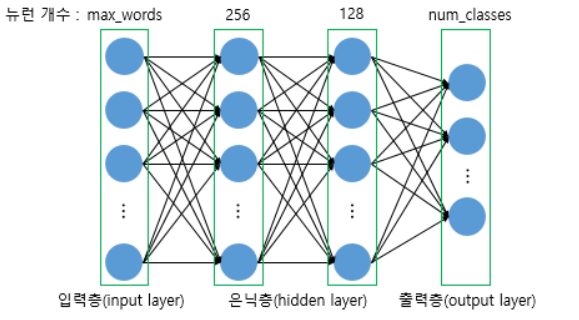

In [33]:
# texts_to_matrix 4개의 모드에 대해 전부 돌려서 모델 결과 비교
modes = ['binary', 'count', 'tfidf', 'freq']

for mode in modes:
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) 
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 2s 21ms/step - loss: 2.2634 - accuracy: 0.3409 - val_loss: 0.9402 - val_accuracy: 0.8233
Epoch 2/5
80/80 [==============================] - 1s 18ms/step - loss: 0.8582 - accuracy: 0.7627 - val_loss: 0.4541 - val_accuracy: 0.8852
Epoch 3/5
80/80 [==============================] - 1s 17ms/step - loss: 0.4329 - accuracy: 0.8855 - val_loss: 0.3483 - val_accuracy: 0.9002
Epoch 4/5
80/80 [==============================] - 1s 17ms/step - loss: 0.2581 - accuracy: 0.9361 - val_loss: 0.3144 - val_accuracy: 0.9099
Epoch 5/5
80/80 [==============================] - 1s 18ms/step - loss: 0.1739 - accuracy: 0.9578 - val_loss: 0.2991 - val_accuracy: 0.9072
binary 모드의 테스트 정확도: 0.8304567337036133
Epoch 1/5
80/80 [==============================] - 2s 21ms/step - loss: 2.6768 - accuracy: 0.2577 - val_loss: 1.4725 - val_accuracy: 0.7323
Epoch 2/5
80/80 [==============================] - 1s 17ms/step - loss: 1.3755 - accuracy: 0.6447 - val_loss: 0.6990 - va

freq만 정확도가 낮다

### 5. Feed forward neural network language model (NNLM)

### 1) 기존 N-gram 모델의 한계
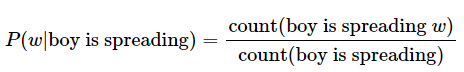
n-gram 언어 모델은 언어 모델링에 바로 앞의 n-1개의 단어만 참고함.      
- sparsity problem: 충분한 데이터를 관측하지 못하면 언어를 정확히 모델링하지 못함.       
단어 시퀀스가 corpus 내에 존재하지 않으면 n-gram 언어모델에서 해당 단어 시퀀스의 확률은 0이 된다.
- 언어 모델이 단어의 유사도를 학습할 수 있다면, 훈련 corpus에 없는 단어에 대한 예측이라도 유사한 단어가 사용된 단어 시퀀스를 참고해서 예측할 수 있을 것!      
__이러한 아이디어에서 탄생한게 NNLM!__

### 2) feed forward neural network model
Ex) "what will the fat cat sit on"      
- 모든 단어를 숫자로 인코딩
```python
what = [1, 0, 0, 0, 0, 0, 0]
will = [0, 1, 0, 0, 0, 0, 0]
the = [0, 0, 1, 0, 0, 0, 0]
fat = [0, 0, 0, 1, 0, 0, 0]
cat = [0, 0, 0, 0, 1, 0, 0]
sit = [0, 0, 0, 0, 0, 1, 0]
on = [0, 0, 0, 0, 0, 0, 1]
```
- n-gram 언어모델처럼 앞의 정해진 n개의 단어만 참고함.
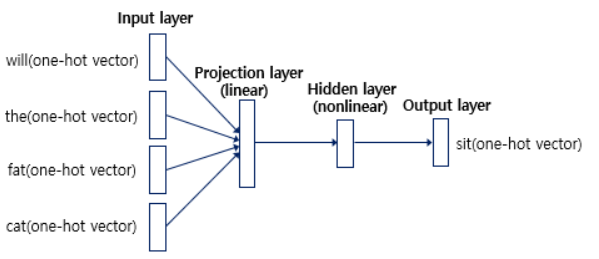
- 4개의 one-hot vector를 입력으로 받아서 projection layer로 넘어간다.    
은닉층과 비슷, 그러나 projection layer는 가중치 행렬과의 연산은 이루어지나 활성화 함수가 없다.
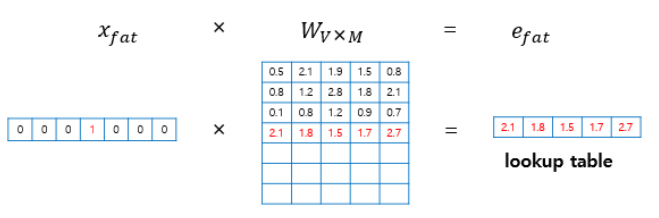
input 단어들은 projection layer에서 V X M 크기의 가중치 행렬과 곱해짐.     
V: 단어집합의 크기, M: projection layer의 크기.     
input layer가 one-hot vector이므로 i번째 인덱스에 1이 있으면 weight matrix의 i번째 행을 그대로 긁어오는 것과 같다!(-> lookup table)      
이 과정을 거쳐 나오는 벡터가 __embedding vector!__
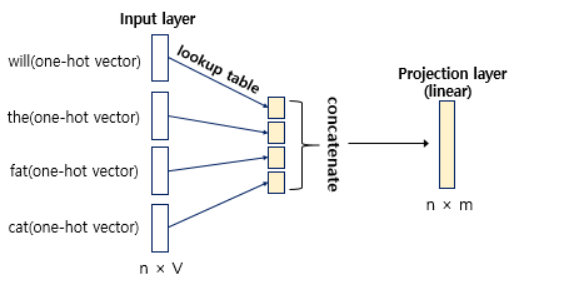
투사층에서 모든 임베딩벡터의 값들은 연결(concatenation)된다.     
projection layer를 식으로 표현하면 다음과 같음
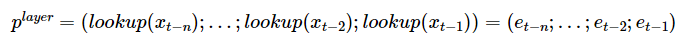
x: 각 단어의 one-hot vector, n: 윈도우 크기
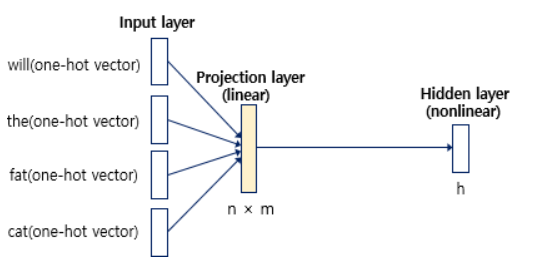
projection layer 다음으로 hidden layer를 사용한다.      
hidden layer의 activation function이 tanh라고 하면, 
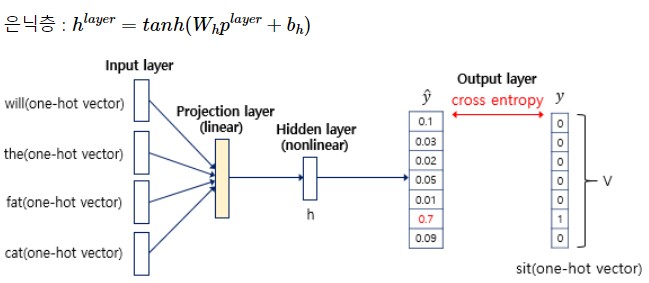
출력층은 V의 크기를 가짐.      
출력층에서는 activatioon function으로 softmax를 사용한다.
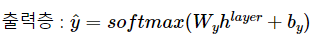       
                   
__NNLM의 장점__        
- 충분한 양의 corpus를 학습한다면 수많은 문장에서 유사한 목적으로 사용되는 단어들에 대해 유사한 임베딩 벡터값을 얻을 수 있다!           
=> 예측 과정에서 corpus에 없던 단어 시퀀스라도 다음 단어를 선택할 수 있음.     
               
__NNLM의 한계__        
n-gram과 마찬가지로 정해진 n개의 단어만을 참고하므로, 버려지는 단어들이 가진 문맥 정보는 참고할 수 없다.